# Regressions

## Index for this notebook:
### 1. Import libraries and data set
### 2. Scatterplot explorations
### 3. Split the data into two sets: a training set and a test set
### 4. Run linear regression
### 5. Check the model performance statistics—MSE and R2 score

## 1. Import libraries and data set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
path = r'C:\Users\Karen\Documents\Personal\Data Analytics\Career Foundry\Achievement 6'

In [4]:
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'billionaires_updated1.csv'), index_col = None)

In [6]:
# To display charts in the notebook without calling them

%matplotlib inline

In [7]:
# Removing the limit to columns displayed

pd.options.display.max_columns = None

In [8]:
df.head()

,Unnamed: 0,rank,final_worth,name,age,country,city,industries,citizenship_country,self_made,gender,state,state_region,cpi_country,cpi_change_country,gdp_country,tertiary_ed_enroll,primary_ed_enroll,life_expectancy_country,total_tax_rate_country,population_country,latitude_country,longitude_country,industries_total,country_total,wealth_category,age_category
0,0,1,211000,Bernard Arnault & family,74.0,France,Paris,Fashion & Retail,France,False,M,NaN,NaN,110.05,1.1,2.715518e+12,65.6,102.5,82.5,60.7,67059887.0,46.227638,2.213749,266,35.0,>=50B,old
1,1,2,180000,Elon Musk,51.0,United States,Austin,Automotive,United States,True,M,Texas,South,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,73,754.0,>=50B,middle-aged
2,2,3,114000,Jeff Bezos,59.0,United States,Medina,Technology,United States,True,M,Washington,West,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,314,754.0,>=50B,middle-aged
3,3,4,107000,Larry Ellison,78.0,United States,Lanai,Technology,United States,True,M,Hawaii,West,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,314,754.0,>=50B,old
4,4,5,106000,Warren Buffett,92.0,United States,Omaha,Finance & Investments,United States,True,M,Nebraska,Midwest,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,372,754.0,>=50B,very old


In [9]:
# Deleting the extra index column

df.drop(columns = 'Unnamed: 0', inplace = True)

In [10]:
df.head()

,rank,final_worth,name,age,country,city,industries,citizenship_country,self_made,gender,state,state_region,cpi_country,cpi_change_country,gdp_country,tertiary_ed_enroll,primary_ed_enroll,life_expectancy_country,total_tax_rate_country,population_country,latitude_country,longitude_country,industries_total,country_total,wealth_category,age_category
0,1,211000,Bernard Arnault & family,74.0,France,Paris,Fashion & Retail,France,False,M,NaN,NaN,110.05,1.1,2.715518e+12,65.6,102.5,82.5,60.7,67059887.0,46.227638,2.213749,266,35.0,>=50B,old
1,2,180000,Elon Musk,51.0,United States,Austin,Automotive,United States,True,M,Texas,South,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,73,754.0,>=50B,middle-aged
2,3,114000,Jeff Bezos,59.0,United States,Medina,Technology,United States,True,M,Washington,West,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,314,754.0,>=50B,middle-aged
3,4,107000,Larry Ellison,78.0,United States,Lanai,Technology,United States,True,M,Hawaii,West,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,314,754.0,>=50B,old
4,5,106000,Warren Buffett,92.0,United States,Omaha,Finance & Investments,United States,True,M,Nebraska,Midwest,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,372,754.0,>=50B,very old


## 2. Scatterplot explorations

### In a previous notebook, "Independent Explorations 1," I explored different variables against eachother using scatterplots to look for possible correlations. The most promising of these was plotting "gdp_country" vs. "country_total." ("Country_total" is the total number of billionaires in each country.) I will use these two variables for the rest of this exploration.

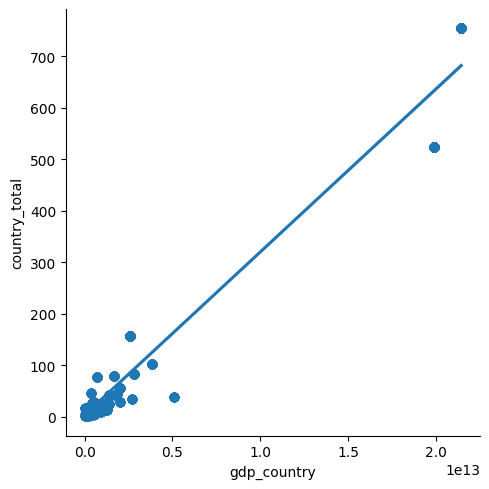

In [11]:
# Seaborn scatterplot for each country's gdp vs. the total number of billionaires in each country

sns.lmplot(x = 'gdp_country', y = 'country_total', data = df)

### *Extreme values check*

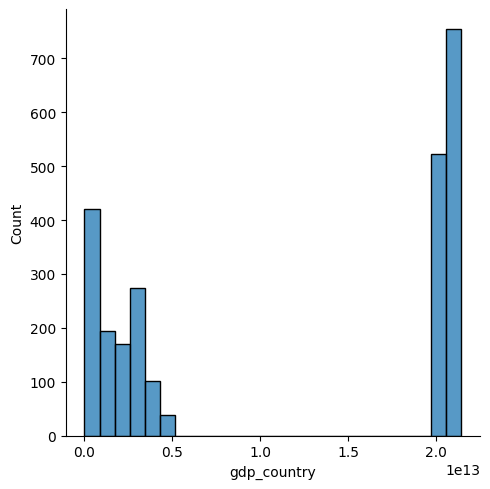

In [22]:
sns.displot(df['gdp_country'], bins=25)

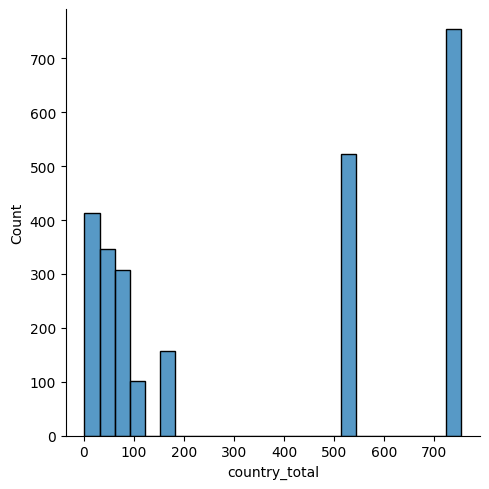

In [24]:
sns.displot(df['country_total'], bins=25)

### There do appear to be two outliers in both GDP and number of billionaires. There are two countries whose gdp is above 10 trillion (and these 2 have the most billionaires). Most are below 6 trillion. I'm going to compare numbers of billionaires in those two groups.

In [25]:
# Create subsets

gdp_large = df[df['gdp_country'] > 10_000_000_000_000]

In [26]:
gdp_small = df[df['gdp_country'] <=10_000_000_000_000]

In [27]:
gdp_large['country'].unique()

array(['United States', 'China'], dtype=object)

In [28]:
gdp_small['country'].unique()

array(['France', 'Mexico', 'India', 'Spain', 'Canada', 'Germany',
       'Switzerland', 'Belgium', 'Austria', 'Japan', 'United Kingdom',
       'Australia', 'Indonesia', 'United Arab Emirates', 'Russia',
       'Chile', 'Monaco', 'Czech Republic', 'Sweden', 'Thailand',
       'Uzbekistan', 'Singapore', 'Nigeria', 'Israel', 'Italy',
       'South Africa', 'Brazil', 'Malaysia', 'South Korea', 'New Zealand',
       'Philippines', 'Norway', 'Egypt', 'Denmark', 'Colombia',
       'Netherlands', 'Poland', 'Ukraine', 'Greece', 'Turkey',
       'Argentina', 'Georgia', 'Portugal', 'Kazakhstan', 'Algeria',
       'Vietnam', 'Latvia', 'Finland', 'Luxembourg', 'Cambodia',
       'Lebanon', 'Oman', 'Cyprus', 'Liechtenstein', 'Romania', 'Qatar',
       'Uruguay', 'Nepal', 'Slovakia', 'Morocco', 'Hungary', 'Tanzania',
       'Bahrain', 'Peru', 'Andorra', 'Armenia'], dtype=object)

In [29]:
gdp_small.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1199 entries, 0 to 2639
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     1199 non-null   int64  
 1   final_worth              1199 non-null   int64  
 2   name                     1199 non-null   object 
 3   age                      1169 non-null   float64
 4   country                  1199 non-null   object 
 5   city                     1174 non-null   object 
 6   industries               1199 non-null   object 
 7   citizenship_country      1199 non-null   object 
 8   self_made                1199 non-null   bool   
 9   gender                   1199 non-null   object 
 10  state                    0 non-null      object 
 11  state_region             0 non-null      object 
 12  cpi_country              1179 non-null   float64
 13  cpi_change_country       1179 non-null   float64
 14  gdp_country              1199

### There are 1199 billionaires in countries with a small GDP

In [30]:
gdp_large.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1277 entries, 1 to 2638
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     1277 non-null   int64  
 1   final_worth              1277 non-null   int64  
 2   name                     1277 non-null   object 
 3   age                      1258 non-null   float64
 4   country                  1277 non-null   object 
 5   city                     1273 non-null   object 
 6   industries               1277 non-null   object 
 7   citizenship_country      1277 non-null   object 
 8   self_made                1277 non-null   bool   
 9   gender                   1277 non-null   object 
 10  state                    753 non-null    object 
 11  state_region             747 non-null    object 
 12  cpi_country              1277 non-null   float64
 13  cpi_change_country       1277 non-null   float64
 14  gdp_country              1277

### There are 1277 billionaires in countries with a large GDP

In [31]:
df['gdp_country'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2640 entries, 0 to 2639
Series name: gdp_country
Non-Null Count  Dtype  
--------------  -----  
2476 non-null   float64
dtypes: float64(1)
memory usage: 20.8 KB


### There are 2476 non-null records for 'gdp_country'. This the same total as records for the 'gdp_small' and 'gdp_large' data frames combined. 

### There are more billionaires in the two countries with the largest GDP (US and China) than there are in all other countries combined.

# Hypothesis: As a country's gross domestic product increases, so does its number of billionaires.

## 3. Split the data into two sets: a training set and a test set

In [32]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['gdp_country'].values.reshape(-1,1)
y = df['country_total'].values.reshape(-1,1)

In [33]:
X

array([[2.71551827e+12],
       [2.14277000e+13],
       [2.14277000e+13],
       ...,
       [1.99100000e+13],
       [1.99100000e+13],
       [3.76795509e+11]])

In [34]:
y

array([[ 35.],
       [754.],
       [754.],
       ...,
       [523.],
       [523.],
       [ 14.]])

In [35]:
# Split data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Run linear regression

In [36]:
# Create a regression object

regression = LinearRegression()

In [38]:
# Fit the regression object onto the training set

regression.fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### It appears as though the linear regression model cannot contain any NaN values. I will further clean the data set of Nan values in the 'gdp_country' column for the sake of this regression.

In [42]:
df['gdp_country'].isnull().sum()

164

In [43]:
# Create a new dataframe with the records dropped that have NaN in 'gdp_country'

df_gdp = df.dropna(subset=['gdp_country'])

In [44]:
df_gdp['gdp_country'].isnull().sum()

0

In [45]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2476 entries, 0 to 2639
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     2476 non-null   int64  
 1   final_worth              2476 non-null   int64  
 2   name                     2476 non-null   object 
 3   age                      2427 non-null   float64
 4   country                  2476 non-null   object 
 5   city                     2447 non-null   object 
 6   industries               2476 non-null   object 
 7   citizenship_country      2476 non-null   object 
 8   self_made                2476 non-null   bool   
 9   gender                   2476 non-null   object 
 10  state                    753 non-null    object 
 11  state_region             747 non-null    object 
 12  cpi_country              2456 non-null   float64
 13  cpi_change_country       2456 non-null   float64
 14  gdp_country              2476

In [52]:
# Reshape the variables into NumPy arrays and put them into separate objects using the new subset.

X = df_gdp['gdp_country'].values.reshape(-1,1)
y = df_gdp['country_total'].values.reshape(-1,1)

In [53]:
X

array([[2.71551827e+12],
       [2.14277000e+13],
       [2.14277000e+13],
       ...,
       [1.99100000e+13],
       [1.99100000e+13],
       [3.76795509e+11]])

In [54]:
y

array([[ 35.],
       [754.],
       [754.],
       ...,
       [523.],
       [523.],
       [ 14.]])

In [55]:
# Again, split data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [56]:
# Again, create a regression object

regression = LinearRegression()

In [57]:
# Again, fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [58]:
# Predict the values of y using x

y_predicted = regression.predict(X_test)

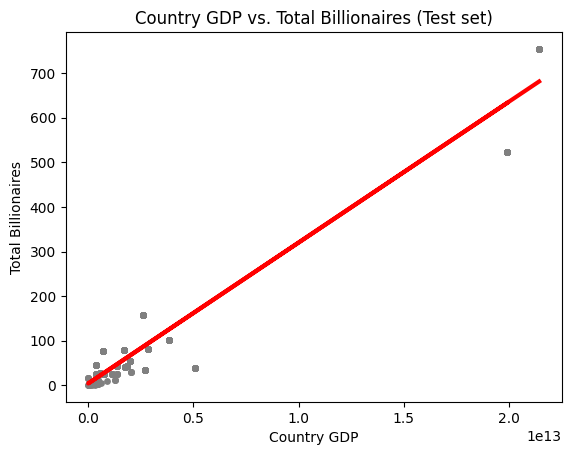

In [59]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Country GDP vs. Total Billionaires (Test set)')
plot_test.xlabel('Country GDP')
plot_test.ylabel('Total Billionaires')
plot_test.show()

### The regression model seems to fit the data quite well. The data points do tend to group up and to the right somewhat along the line. They may be more scattered if we zoomed in more by removing the two countries with the high GDP and high number of billionaires (the US and China).

## 5. Check the model performance statistics—MSE and R2 score

In [60]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [61]:
# Print the model summary statistics.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.15881171e-11]]
Mean squared error:  5146.326534256342
R2 score:  0.9476070376310997


In [62]:
# Compare the predicted y values with the actual y values in a dataframe.

data = pd.DataFrame({'Actual' : y_test.flatten(), 'Predicted' : y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,754.0,681.010097
1,754.0,681.010097
2,102.0,125.625612
3,43.0,48.141558
4,523.0,633.068812
5,157.0,86.625974
6,754.0,681.010097
7,523.0,633.068812
8,523.0,633.068812
9,157.0,86.625974


#### *Compare how the regression fits the training set*

In [63]:
# Predicting the X_train

y_predicted_train = regression.predict(X_train)

In [64]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [65]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.15881171e-11]]
Mean squared error:  4910.138683844542
R2 score:  0.9489048741853465


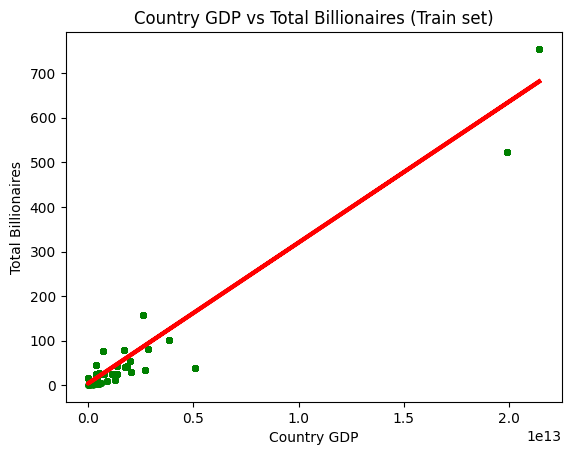

In [66]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Country GDP vs Total Billionaires (Train set)')
plot_test.xlabel('Country GDP')
plot_test.ylabel('Total Billionaires')
plot_test.show()

## I think the model performed well on the test. The training set and the test set had very similar slopes, RMSEs, and R2 scores. There does seem to be a high correlation between a country's GDP and the number of billionaires in that country.

## Possible bias: there are 2,476 records that were analyzed here. That may not be enough observations to produce a reliable regression model. Also, there are definitately data points that are above or below the regression line by a noticable amount. There are surely other factors that affect the number of billionaires in a country, but this does seem to be a strong relationship.

## I considered removing the two biggest outliers, the US and China, to see how the model fit on the rest of the data. However, I'm hesitant to do that because 1) they do fit the model well: they have the largest GDPs and the highest number of billionaires, and 2) since those two countries together have more billionaires than the rest of the countries combined, the majority of the data would have to be excluded to perform that analysis. This could greatly distort reality.